In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [74]:
test_video = cv2.VideoCapture('/Users/bogdanivanyuk/Desktop/player-localization/dataset/videos/8.mov')

In [75]:
imgs = list()

In [76]:
counter = 0
while True:
    ret, frame = test_video.read()
    #print(ret, frame)
    if not ret:
        break
    #plt.imshow(frame)
    #plt.show();
    imgs.append(frame)
    if counter >= 50:
        break
    counter += 1

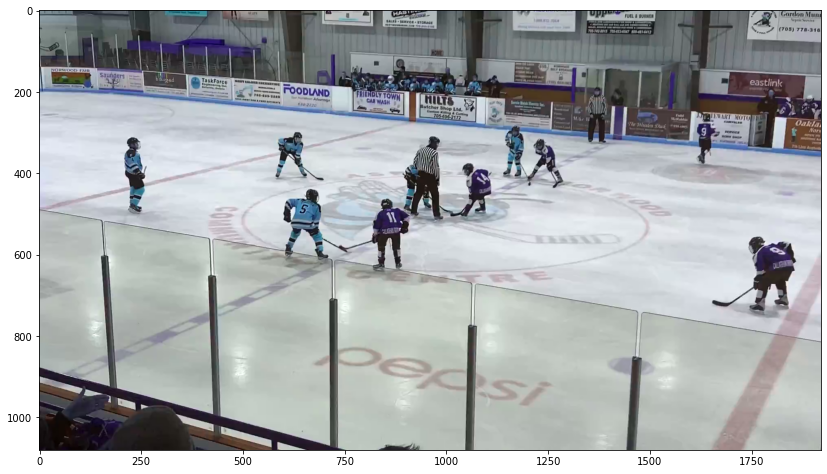

In [77]:
bgr_img = imgs[0]
plt.figure(figsize=(14, 10))
plt.imshow(bgr_img)
plt.show()

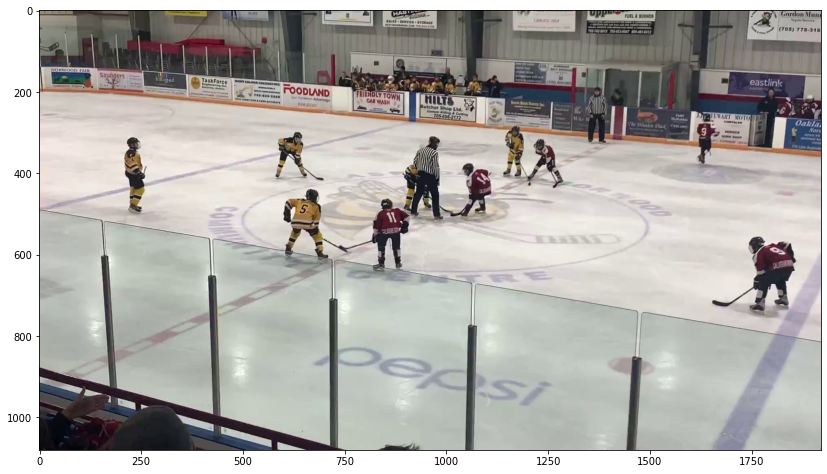

In [78]:
rgb_img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 10))
plt.imshow(rgb_img)
plt.show()

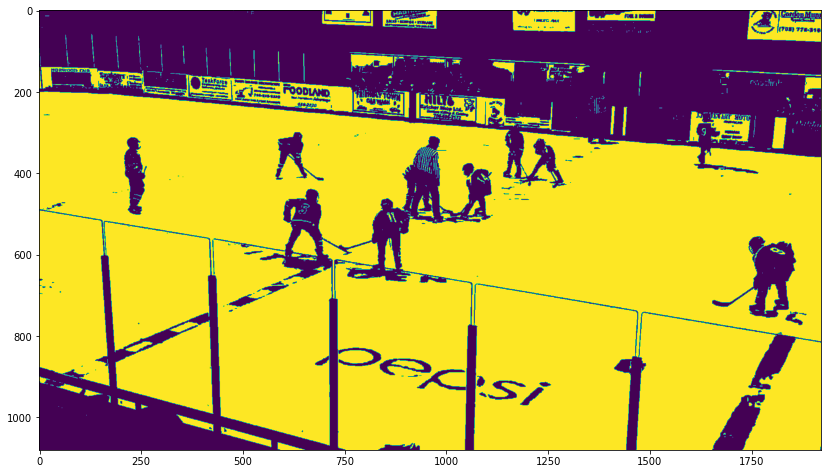

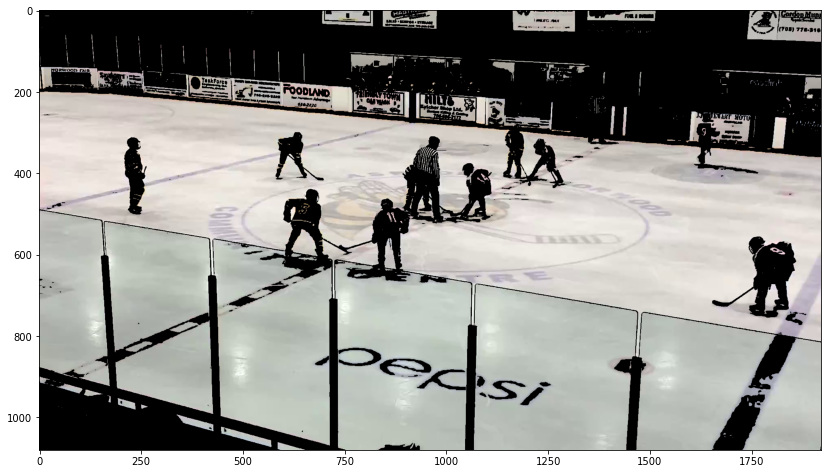

In [80]:
# image is expected be in RGB color space
def select_rgb_yellow(image): 
    lower = np.uint8([160, 160,   0])
    upper = np.uint8([255, 255, 255])
    mask = cv2.inRange(image, lower, upper)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(mask)
    plt.show()
    # combine the mask
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked


res = select_rgb_yellow(rgb_img)
plt.figure(figsize=(14, 10))
plt.imshow(res)
plt.show()

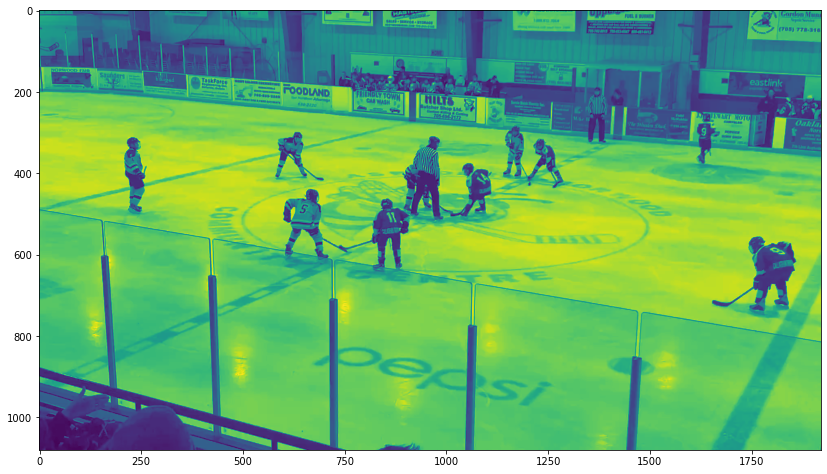

In [81]:
gray_img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 10))
plt.imshow(gray_img)
plt.show()

In [82]:
f = np.fft.fft2(gray_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

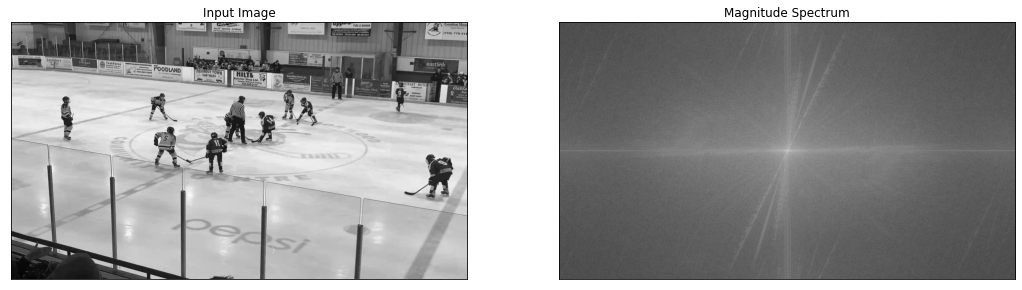

In [83]:
plt.figure(figsize=(18, 16))
plt.subplot(121),plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [96]:
gray_img.shape

(1080, 1920)

In [100]:
def blabla(img, radius=90):
    assert len(img.shape) == 2
    dft = cv2.dft(np.float32(gray_img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # create a mask first, center square is 1, remaining all zeros
    rows, cols = gray_img.shape
    crow,ccol = rows // 2 , cols // 2
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow - radius : crow + radius, ccol - radius : ccol + radius] = 1
    
    # apply mask and inverse DFT
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    img_back = img_back / np.max(img_back)
    mask = cv2.inRange(img_back, 0.5, 1.)
    return img_back, mask

In [101]:
img_back_func, mask_func = blabla(gray_img)

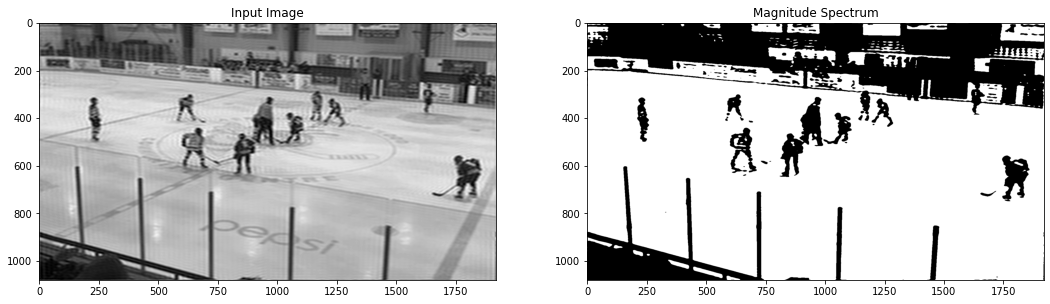

In [102]:
plt.figure(figsize=(18, 16))
plt.subplot(121),plt.imshow(img_back_func, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(mask_func, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

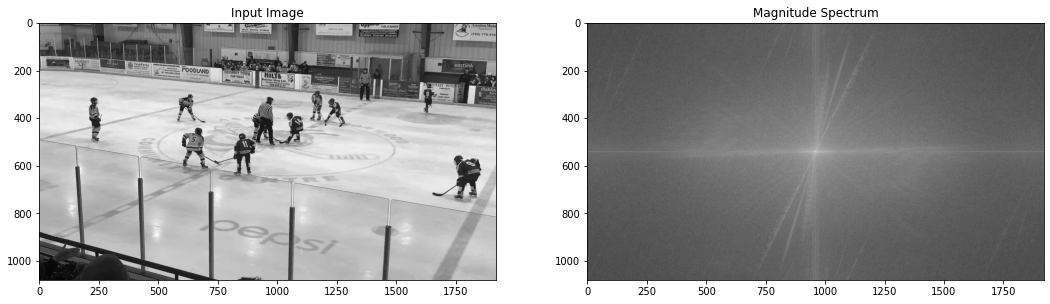

In [84]:
dft = cv2.dft(np.float32(gray_img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.figure(figsize=(18, 16))
plt.subplot(121),plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

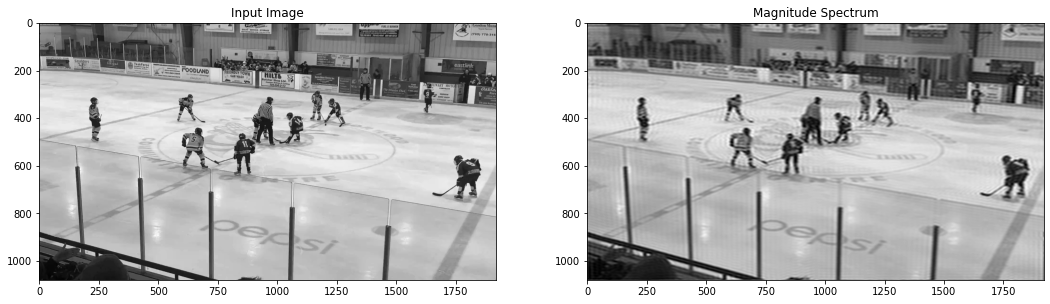

In [85]:
rows, cols = gray_img.shape

crow,ccol = rows // 2 , cols // 2
radius = 90
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow - radius : crow + radius, ccol - radius : ccol + radius] = 1
# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(18, 16))
plt.subplot(121)
plt.imshow(gray_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

In [86]:
img_back = img_back / np.max(img_back)

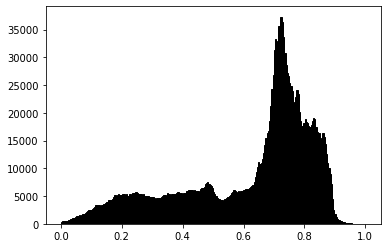

In [87]:
plt.hist(img_back.ravel(), bins=256, fc='k', ec='k'); #calculating histogram

In [88]:
np.max(img_back)

1.0

In [89]:
img_back.shape

(1080, 1920)

In [97]:
mask = cv2.inRange(img_back, 0.5, 1.)

In [98]:
mask.shape

(1080, 1920)

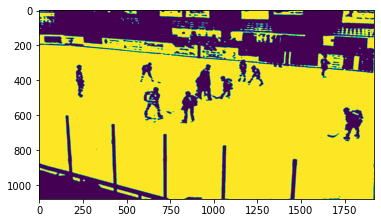

In [99]:
plt.imshow(mask)